In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from collections import Counter
#from imblearn.datasets import fetch_datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt



#loading csv into dataframe

url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
df1 = pd.read_csv(url)

Using TensorFlow backend.


In [2]:
#to replace '?' with NA values

df1.replace({'?': None},inplace =True)

In [3]:
#to check null values in a column

df1.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [4]:

#converting from object to float64
# df1 = df1.convert_objects(convert_numeric=True)

df1['Attr1'] = pd.to_numeric(df1['Attr1'])
df1['Attr2'] = pd.to_numeric(df1['Attr2'])
df1['Attr3'] = pd.to_numeric(df1['Attr3'])
df1['Attr4'] = pd.to_numeric(df1['Attr4'])
df1['Attr5'] = pd.to_numeric(df1['Attr5'])
df1['Attr6'] = pd.to_numeric(df1['Attr6'])
df1['Attr7'] = pd.to_numeric(df1['Attr7'])
df1['Attr8'] = pd.to_numeric(df1['Attr8'])
df1['Attr9'] = pd.to_numeric(df1['Attr9'])
df1['Attr10'] = pd.to_numeric(df1['Attr10'])
df1['Attr11'] = pd.to_numeric(df1['Attr11'])
df1['Attr12'] = pd.to_numeric(df1['Attr12'])
df1['Attr13'] = pd.to_numeric(df1['Attr13'])
df1['Attr14'] = pd.to_numeric(df1['Attr14'])
df1['Attr15'] = pd.to_numeric(df1['Attr15'])
df1['Attr16'] = pd.to_numeric(df1['Attr16'])
df1['Attr17'] = pd.to_numeric(df1['Attr17'])
df1['Attr18'] = pd.to_numeric(df1['Attr18'])
df1['Attr19'] = pd.to_numeric(df1['Attr19'])
df1['Attr20'] = pd.to_numeric(df1['Attr20'])
df1['Attr21'] = pd.to_numeric(df1['Attr21'])
df1['Attr22'] = pd.to_numeric(df1['Attr22'])
df1['Attr23'] = pd.to_numeric(df1['Attr23'])
df1['Attr24'] = pd.to_numeric(df1['Attr24'])
df1['Attr25'] = pd.to_numeric(df1['Attr25'])
df1['Attr26'] = pd.to_numeric(df1['Attr26'])
df1['Attr27'] = pd.to_numeric(df1['Attr27'])
df1['Attr28'] = pd.to_numeric(df1['Attr28'])
df1['Attr29'] = pd.to_numeric(df1['Attr29'])
df1['Attr30'] = pd.to_numeric(df1['Attr30'])
df1['Attr31'] = pd.to_numeric(df1['Attr31'])
df1['Attr32'] = pd.to_numeric(df1['Attr32'])
df1['Attr33'] = pd.to_numeric(df1['Attr33'])
df1['Attr34'] = pd.to_numeric(df1['Attr34'])
df1['Attr35'] = pd.to_numeric(df1['Attr35'])
df1['Attr36'] = pd.to_numeric(df1['Attr36'])
df1['Attr37'] = pd.to_numeric(df1['Attr37'])
df1['Attr38'] = pd.to_numeric(df1['Attr38'])
df1['Attr39'] = pd.to_numeric(df1['Attr39'])
df1['Attr40'] = pd.to_numeric(df1['Attr40'])
df1['Attr41'] = pd.to_numeric(df1['Attr41'])
df1['Attr42'] = pd.to_numeric(df1['Attr42'])
df1['Attr43'] = pd.to_numeric(df1['Attr43'])
df1['Attr44'] = pd.to_numeric(df1['Attr44'])
df1['Attr45'] = pd.to_numeric(df1['Attr45'])
df1['Attr46'] = pd.to_numeric(df1['Attr46'])
df1['Attr47'] = pd.to_numeric(df1['Attr47'])
df1['Attr48'] = pd.to_numeric(df1['Attr48'])
df1['Attr49'] = pd.to_numeric(df1['Attr49'])
df1['Attr50'] = pd.to_numeric(df1['Attr50'])
df1['Attr51'] = pd.to_numeric(df1['Attr51'])
df1['Attr52'] = pd.to_numeric(df1['Attr52'])
df1['Attr53'] = pd.to_numeric(df1['Attr53'])
df1['Attr54'] = pd.to_numeric(df1['Attr54'])
df1['Attr55'] = pd.to_numeric(df1['Attr55'])
df1['Attr56'] = pd.to_numeric(df1['Attr56'])
df1['Attr57'] = pd.to_numeric(df1['Attr57'])
df1['Attr58'] = pd.to_numeric(df1['Attr58'])
df1['Attr59'] = pd.to_numeric(df1['Attr59'])
df1['Attr60'] = pd.to_numeric(df1['Attr60'])
df1['Attr61'] = pd.to_numeric(df1['Attr61'])
df1['Attr62'] = pd.to_numeric(df1['Attr62'])
df1['Attr63'] = pd.to_numeric(df1['Attr63'])
df1['Attr64'] = pd.to_numeric(df1['Attr64'])

df1.dtypes

df1.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

In [ ]:
#check profile report of the dataset

profile = df1.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [5]:
# dropping duplicate values 

df1.drop_duplicates(keep=False,inplace=True) 

In [6]:
#delete because of large number of missing values

del df1['Attr37']

In [7]:
#imputing missing values by mean

df1.fillna(df1.mean(), inplace=True)

#number of missing values

df1.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 64, dtype: int64

In [8]:
#delete because of high correlation

df1 = df1.drop(['Attr11','Attr16','Attr18','Attr22','Attr23','Attr26','Attr31','Attr33',
        'Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54',
        'Attr56','Attr60','Attr62','Attr63','Attr64','Attr7','Attr8'], axis = 1)

In [141]:
df1.shape
df1.head(3)

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr9,Attr10,Attr12,Attr13,Attr14,...,Attr47,Attr51,Attr52,Attr53,Attr55,Attr57,Attr58,Attr59,Attr61,class
0,0.088238,0.55472,0.01134,-66.5200,0.34204,1.0881,0.32036,0.197600,0.096885,0.109490,...,54.621,0.55407,0.42557,0.73717,15182.0,0.275430,0.91905,0.002024,4.7343,0
1,-0.006202,0.48465,0.23298,6.1825,0.00000,1.2757,0.51535,-0.015967,0.037544,-0.006202,...,58.258,0.38846,0.29604,1.36140,2341.8,-0.012035,1.00470,0.152220,3.2749,0
2,0.130240,0.22142,0.57751,120.0400,0.18764,1.1415,0.67731,0.732180,0.165680,0.162120,...,47.382,0.22142,0.22371,3.36840,33401.0,0.192290,0.87604,0.000000,2.9870,0


# FEATURE SELECTION RANDOM FOREST

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [10]:

# Create a list of feature names
feat_labels = ['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10',
              'Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20',
              'Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30',
              'Attr32','Attr36','Attr39',
              'Attr41','Attr42','Attr43','Attr45','Attr47',
              'Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59',
               'Attr61'
              ]


In [11]:
#Create X from the features
X = df1[feat_labels].values
#X = df1.iloc[:,:31]

# Create y from output
y = df1['class'].values.ravel()
#y = df1.iloc[:,31]

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Attr1', 0.027591918833885107)
('Attr2', 0.016095535109824543)
('Attr3', 0.024633088062148565)
('Attr5', 0.017566884919741874)
('Attr6', 0.022341684789630053)
('Attr9', 0.024445543623779965)
('Attr10', 0.018169188943307345)
('Attr12', 0.020546371953517942)
('Attr13', 0.029548036841272433)
('Attr14', 0.027224671754813624)
('Attr15', 0.02586829696739935)
('Attr17', 0.016494773722498114)
('Attr19', 0.02392922848783537)
('Attr20', 0.014438103931648572)
('Attr21', 0.09961359554542011)
('Attr24', 0.038206224024632474)
('Attr25', 0.022354495094863536)
('Attr27', 0.06966182184329177)
('Attr28', 0.022296572829685384)
('Attr29', 0.02764127489026749)
('Attr30', 0.0163657865079402)
('Attr32', 0.016173909103129686)
('Attr36', 0.018125411522987286)
('Attr39', 0.056015258394595084)
('Attr41', 0.045584182145104)
('Attr42', 0.04182460764531087)
('Attr43', 0.018639018353756486)
('Attr45', 0.01903872933861213)
('Attr47', 0.013465773485520045)
('Attr51', 0.018854939962981758)
('Attr52', 0.015557464847323

In [12]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.015
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [13]:
#Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [142]:
X_filtered = sfm.transform(X)

In [15]:
#converting X_filtered to Dataframe

X_filtered = pd.DataFrame(data=X_filtered,
          index=np.arange(1, 5791),
          columns=np.arange(1, 8))

# SMOTE ENN

In [16]:
# Split the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=0)

0    5384
1     406
Name: class, dtype: int64

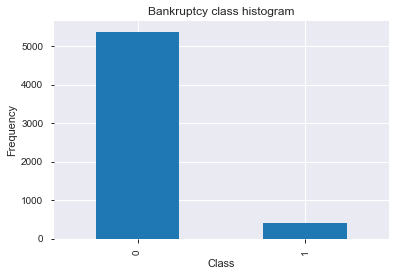

In [17]:
import matplotlib.pyplot as plt

pd.value_counts(df1['class']).plot.bar()
plt.title('Bankruptcy class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df1['class'].value_counts()

In [18]:
#SMOTE+ENN Technique

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=0)

columns = X_train.columns

X_res, y_res = sme.fit_resample(X_train, y_train)

#X_res = pd.DataFrame(data=X_res,columns=columns)
#y_res = pd.DataFrame(data=y_res,columns=['y'])


print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4300, 1: 332})
Resampled dataset shape Counter({1: 3774, 0: 3328})


Text(0, 0.5, 'Frequency')

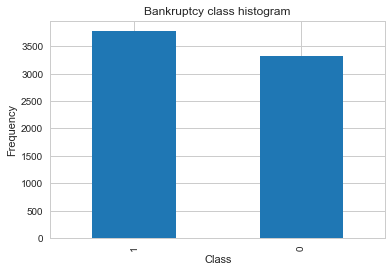

In [137]:
pd.value_counts(y_res).plot.bar()
plt.title('Bankruptcy class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


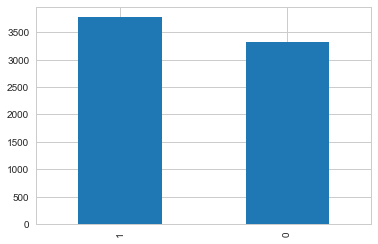

# RANDOM FOREST

In [19]:
# Create a new random forest classifier for the most important features
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_rf_pred = clf.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_rf_pred)

0.8998272884283247

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_rf_pred)

array([[988,  96],
       [ 20,  54]], dtype=int64)

In [22]:
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_rf_pred) # Create CM From Data
cm.table
print(cm)

Predict   0         1         
Actual
0         988       96        

1         20        54        





Overall Statistics : 

95% CI                                                            (0.88253,0.91712)
ACC Macro                                                         0.89983
AUNP                                                              0.82058
AUNU                                                              0.82058
Bennett S                                                         0.79965
CBA                                                               0.63572
CSI                                                               0.49066
Chi-Squared                                                       252.55885
Chi-Squared DF                                                    1
Conditional Entropy                                               0.45786
Cramer V                                                          0.46701
Cross Entropy                                      

In [23]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  988
False Positives:  96
False Negatives:  20
True Positives:  54


In [45]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#GMean
GM = math.sqrt(Specificity*Recall)
print("Geometric Mean Score {:0.2f}".format(GM))

#TPR & FPR
#TPR = tp/(tp+fn)
#FPR = fp/(fp+tn)


Specificity 0.80
Recall / Sensitivity 0.68
Geometric Mean Score 0.74


In [101]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [103]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200, 5000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_res, y_res)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 105.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 164.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 165.4min finished


In [111]:
gridF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [112]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=25, min_samples_leaf=1, min_samples_split=2, criterion='gini')

In [113]:
rfc1.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [114]:
pred=rfc1.predict(X_test)

In [115]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8998272884283247


In [116]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  988
False Positives:  96
False Negatives:  20
True Positives:  54


#  KNN

In [31]:
import numpy as np
from sklearn import neighbors
import pandas as pd

In [32]:
clf_knn = neighbors.KNeighborsClassifier()

In [33]:
clf_knn.fit(X_res, y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_knn_pred = clf_knn.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_knn_pred)

0.7936096718480138

In [35]:
accuracy = clf_knn.score(X_test, y_test)
print(accuracy)

0.7936096718480138


In [36]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_knn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  869
False Positives:  215
False Negatives:  24
True Positives:  50


In [38]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#GMean
GM = math.sqrt(Specificity*Recall)
print("Geometric Mean Score {:0.2f}".format(GM))

Specificity 0.80
Recall / Sensitivity 0.68
Geometric Mean Score 0.74


# NEURAL NETWORK

In [58]:
from sklearn.preprocessing import StandardScaler 

In [59]:
# Define the scaler
scaler = StandardScaler().fit(X_res)

# Scale the train set
X_nn_res = scaler.transform(X_res)

# Scale the test set
X_nn_test = scaler.transform(X_test)

In [60]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(7,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [61]:
# Model output shape
model.output_shape

# Model summary
model.summary

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

[array([[-0.35870564, -0.48075053,  0.47167224,  0.38249737,  0.19643843,
         -0.31798643,  0.50265783,  0.37986183,  0.21740049,  0.19191247,
          0.03750437, -0.18749315],
        [-0.48749077,  0.31960434, -0.47889063,  0.50038797,  0.04384416,
          0.5448695 , -0.38188118, -0.20202553, -0.22672081, -0.08872896,
          0.46745187, -0.50827146],
        [-0.2007471 ,  0.51490694,  0.0663529 ,  0.2664829 ,  0.32800955,
          0.21771562,  0.02219331,  0.12507606, -0.36750033, -0.5351049 ,
          0.46344382,  0.39015043],
        [-0.35140216,  0.3987137 , -0.32216257,  0.5533766 ,  0.33990496,
         -0.18425113,  0.18591744, -0.4494052 ,  0.43655062, -0.21458077,
         -0.48078388,  0.11328787],
        [ 0.00396246,  0.4614187 , -0.23674327, -0.4344532 ,  0.5546214 ,
          0.32237935, -0.2253873 ,  0.18405968, -0.36742517, -0.09345657,
          0.14604896,  0.08365089],
        [-0.03995675,  0.42688042, -0.0274964 ,  0.33859932, -0.30176923,
      

In [62]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_nn_res, y_res, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
7102/7102 [==============================] - 30s 4ms/step - loss: 0.5109 - accuracy: 0.7685
Epoch 2/20
7102/7102 [==============================] - 32s 4ms/step - loss: 0.4584 - accuracy: 0.8009
Epoch 3/20
7102/7102 [==============================] - 37s 5ms/step - loss: 0.4180 - accuracy: 0.8320
Epoch 4/20
7102/7102 [==============================] - 44s 6ms/step - loss: 0.3862 - accuracy: 0.8479
Epoch 5/20
7102/7102 [==============================] - 44s 6ms/step - loss: 0.3816 - accuracy: 0.8627
Epoch 6/20
7102/7102 [==============================] - 31s 4ms/step - loss: 0.3579 - accuracy: 0.8668
Epoch 7/20
7102/7102 [==============================] - 31s 4ms/step - loss: 0.3416 - accuracy: 0.8698
Epoch 8/20
7102/7102 [==============================] - 34s 5ms/step - loss: 0.3332 - accuracy: 0.8719
Epoch 9/20
7102/7102 [==============================] - 35s 5ms/step - loss: 0.3262 - accuracy: 0.8748
Epoch 10/20
7102/7102 [==============================] - 32s 4ms/step - l

In [63]:
y_nn_pred = model.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

ValueError: Error when checking input: expected dense_1_input to have shape (7,) but got array with shape (1,)

In [67]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_nn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# AdaBoost

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [118]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_res, y_res)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [119]:
predictions = classifier.predict(X_test)

In [120]:
confusion_matrix(y_test, predictions)

array([[915, 169],
       [ 18,  56]], dtype=int64)

In [131]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  915
False Positives:  169
False Negatives:  18
True Positives:  56


In [132]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#GMean
GM = math.sqrt(Specificity*Recall)
print("Geometric Mean Score {:0.2f}".format(GM))

Specificity 0.84
Recall / Sensitivity 0.76
Geometric Mean Score 0.80


# DECISION TREE

In [123]:
#Decision tree implementation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)


c:\users\shant\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
y_dt_pred = dt.predict(X_test)

In [126]:
confusion_matrix(y_test, y_dt_pred)

array([[938, 146],
       [ 27,  47]], dtype=int64)

In [129]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_dt_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  938
False Positives:  146
False Negatives:  27
True Positives:  47


In [130]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#GMean
GM = math.sqrt(Specificity*Recall)
print("Geometric Mean Score {:0.2f}".format(GM))

Specificity 0.87
Recall / Sensitivity 0.64
Geometric Mean Score 0.74
